# Eye State EEG Classification

## Data Loading

In [2]:
# Importing dataset via kaggle

!kaggle datasets download -d robikscube/eye-state-classification-eeg-dataset

Dataset URL: https://www.kaggle.com/datasets/robikscube/eye-state-classification-eeg-dataset
License(s): CC0-1.0
100%|█████████████████████████████████████████| 827k/827k [00:01<00:00, 575kB/s]
100%|█████████████████████████████████████████| 827k/827k [00:01<00:00, 575kB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/DeepLearning/Eye State EEG Classification/eye-state-classification-eeg-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/DeepLearning/Eye State EEG Classification')
zip_ref.close()

## Exploratory Data Analysis

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('EEG_Eye_State_Classification.csv')

In [6]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [7]:
df.size

224700

In [8]:
df.shape

(14980, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AF3,14980.0,4321.917777,2492.072174,1030.7700,4280.51,4294.36,4311.79,309231.00
F7,14980.0,4009.767694,45.941672,2830.7700,3990.77,4005.64,4023.08,7804.62
F3,14980.0,4264.022433,44.428052,1040.0000,4250.26,4262.56,4270.77,6880.51
FC5,14980.0,4164.946326,5216.404632,2453.3300,4108.21,4120.51,4132.31,642564.00
T7,14980.0,4341.741075,34.738821,2089.7400,4331.79,4338.97,4347.18,6474.36
P7,14980.0,4644.022379,2924.789537,2768.2100,4611.79,4617.95,4626.67,362564.00
O1,14980.0,4110.400160,4600.926543,2086.1500,4057.95,4070.26,4083.59,567179.00
O2,14980.0,4616.056904,29.292603,4567.1800,4604.62,4613.33,4624.10,7264.10
P8,14980.0,4218.826610,2136.408523,1357.9500,4190.77,4199.49,4209.23,265641.00
T8,14980.0,4231.316200,38.050903,1816.4100,4220.51,4229.23,4239.49,6674.36


In [11]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

AF3             548
F7              452
F3              345
FC5             312
T7              285
P7              330
O1              290
O2              294
P8              304
T8              346
FC6             419
F4              343
F8              558
AF4             592
eyeDetection      2
dtype: int64

In [14]:
df['eyeDetection'].value_counts()

eyeDetection
0    8257
1    6723
Name: count, dtype: int64

## Data Visualization

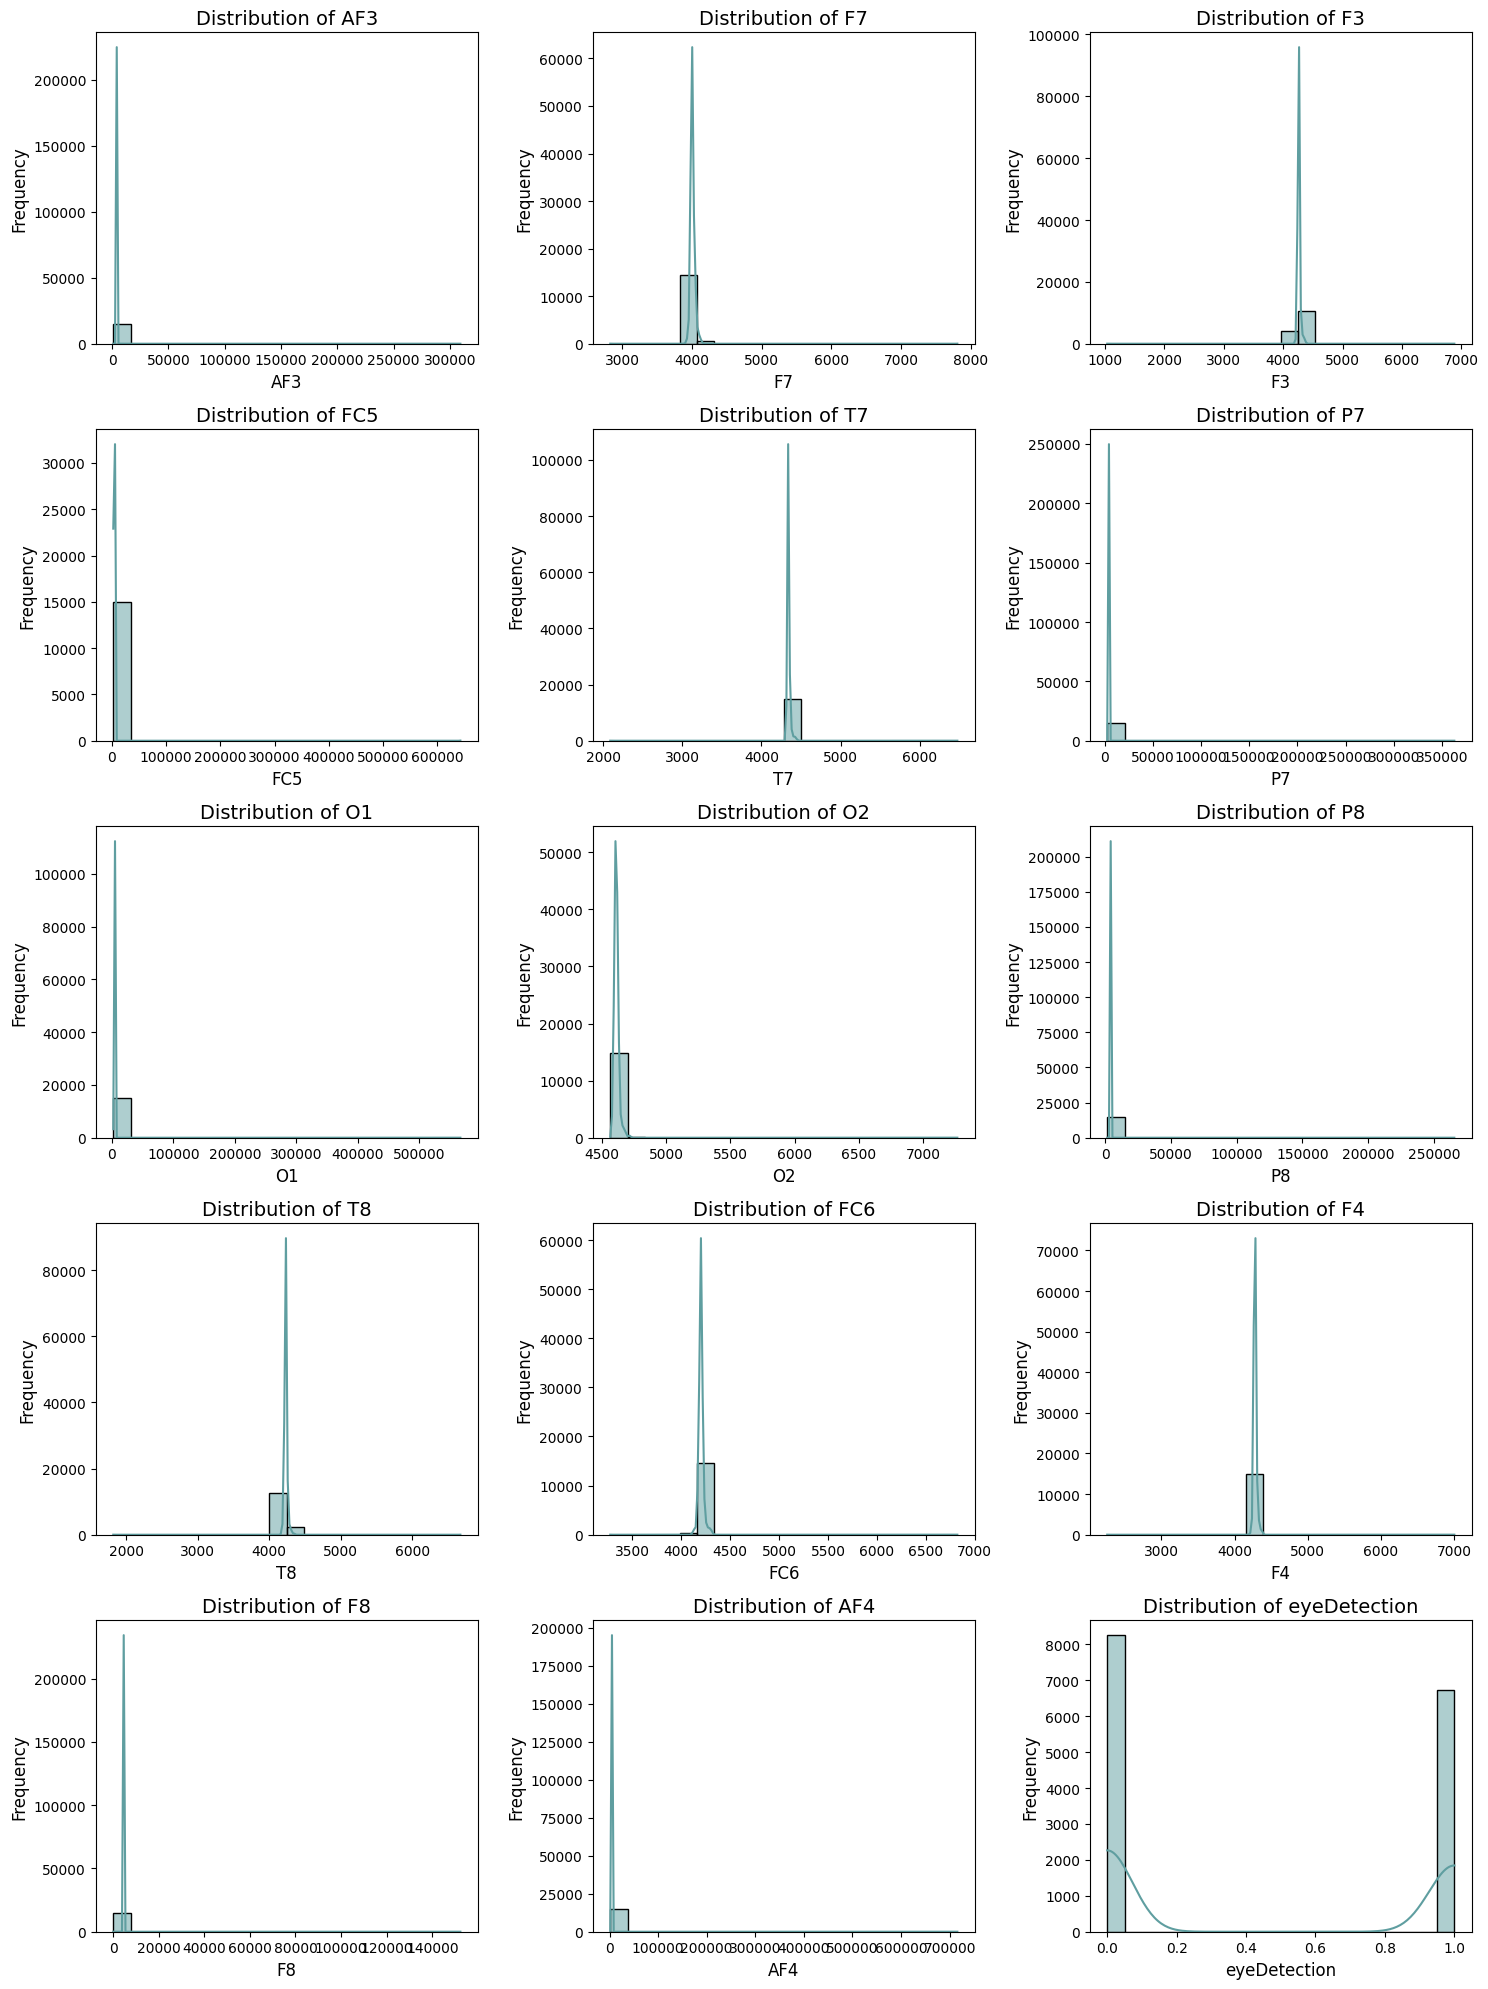

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True, axis=1)

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

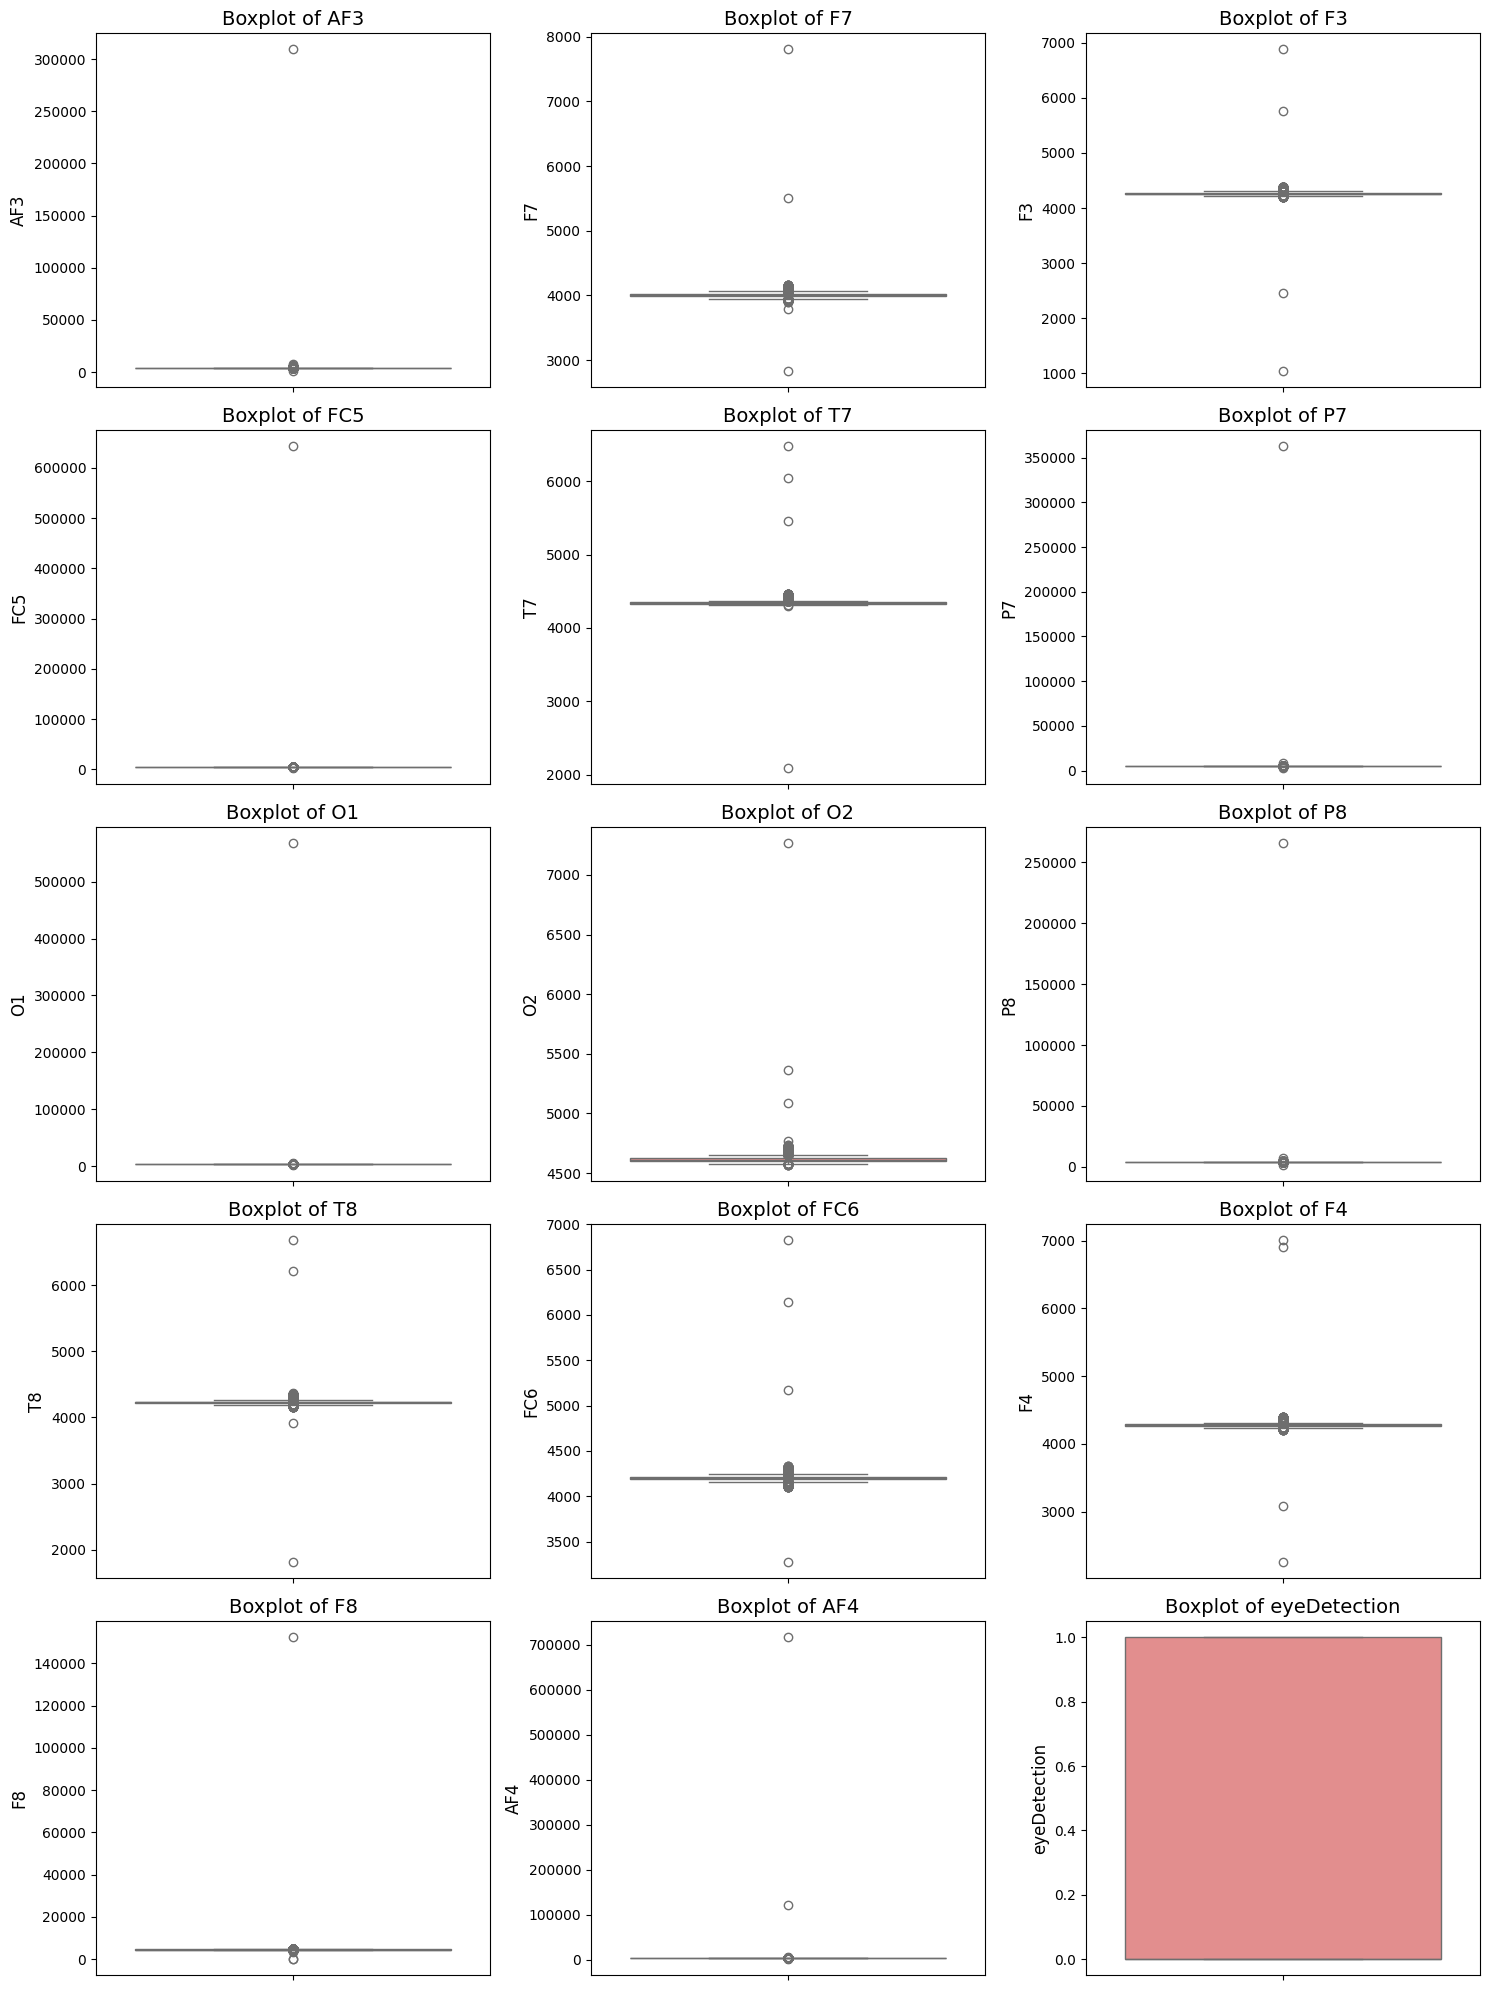

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

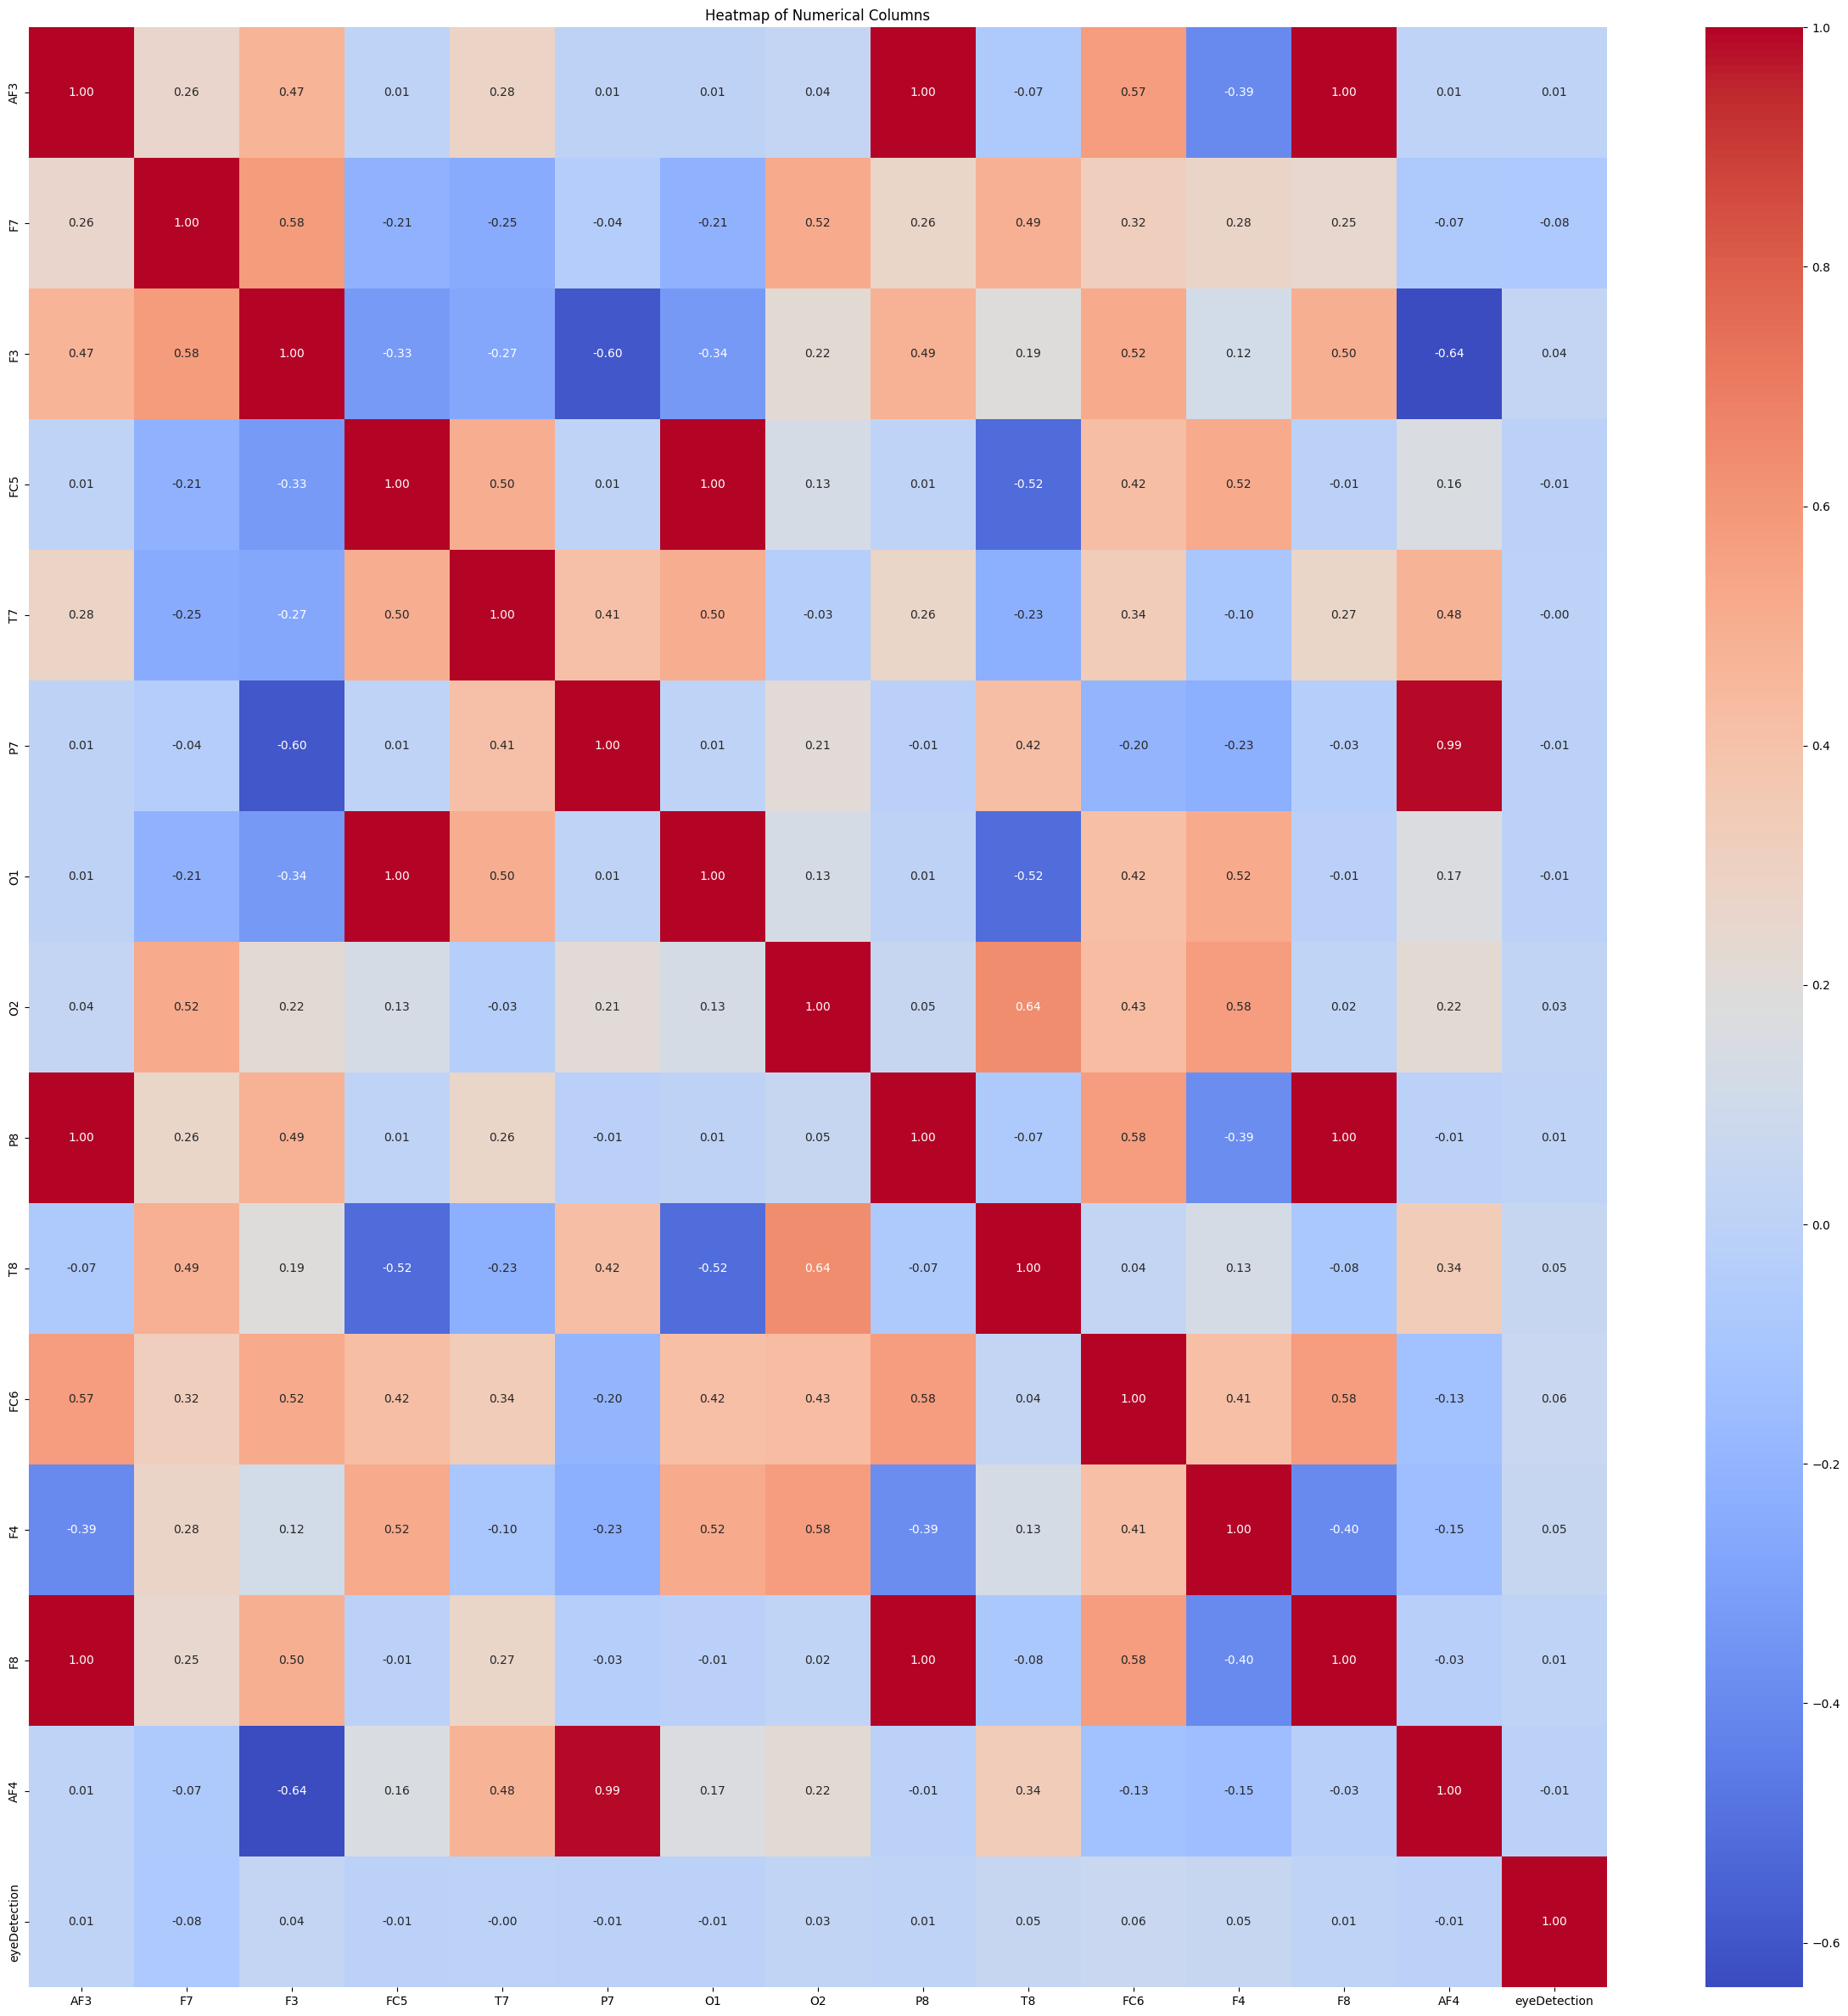

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(30, 30))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [27]:
# Dropping highly correlated features

def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

df, dropped_columns = remove_highly_correlated_features(df, threshold=0.85)
print("Dropped Columns:", dropped_columns)


Dropped Columns: ['O1', 'P8', 'F8', 'AF4']


In [28]:
X = df.drop(['eyeDetection'],axis=1)
y = df['eyeDetection']

In [29]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### ML Models

In [31]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [33]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.5644192256341789, 0.5627503337783711, 0.8691588785046729, 0.8694926568758344, 0.6425233644859814, 0.7663551401869159, 0.8457943925233645, 0.7820427236315087, 0.6455273698264352]


#### Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.78      0.66      1586
           1       0.57      0.32      0.41      1410

    accuracy                           0.56      2996
   macro avg       0.56      0.55      0.53      2996
weighted avg       0.56      0.56      0.54      2996

Confusion Matrix:
 [[1239  347]
 [ 958  452]]


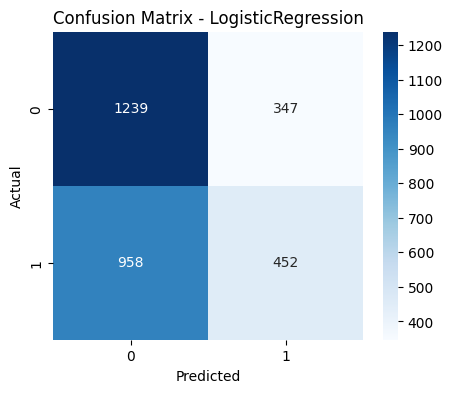

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.78      0.65      1586
           1       0.56      0.31      0.40      1410

    accuracy                           0.56      2996
   macro avg       0.56      0.55      0.53      2996
weighted avg       0.56      0.56      0.54      2996

Confusion Matrix:
 [[1242  344]
 [ 966  444]]


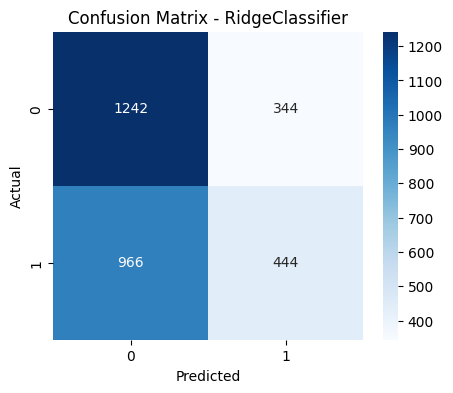

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1586
           1       0.88      0.84      0.86      1410

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Confusion Matrix:
 [[1424  162]
 [ 230 1180]]


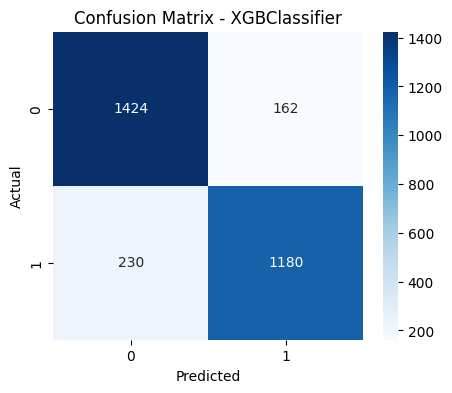

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1586
           1       0.90      0.83      0.86      1410

    accuracy                           0.88      2996
   macro avg       0.88      0.87      0.87      2996
weighted avg       0.88      0.88      0.88      2996

Confusion Matrix:
 [[1457  129]
 [ 243 1167]]


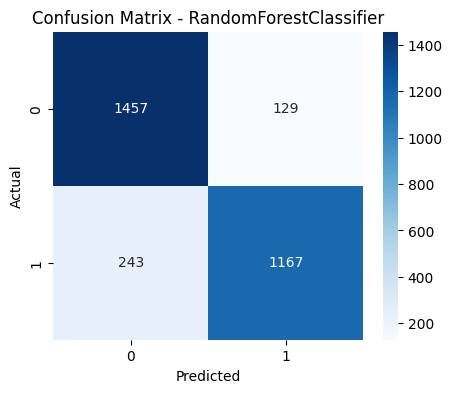

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70      1586
           1       0.66      0.49      0.56      1410

    accuracy                           0.64      2996
   macro avg       0.65      0.63      0.63      2996
weighted avg       0.65      0.64      0.63      2996

Confusion Matrix:
 [[1241  345]
 [ 726  684]]


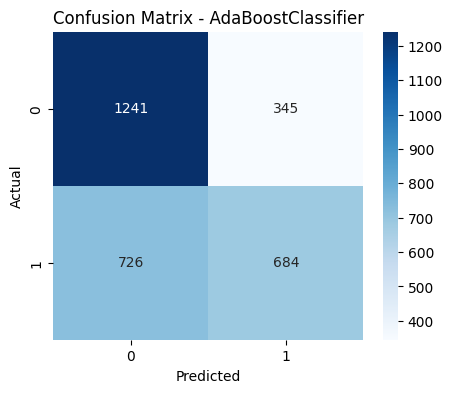

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1586
           1       0.79      0.68      0.73      1410

    accuracy                           0.77      2996
   macro avg       0.77      0.76      0.76      2996
weighted avg       0.77      0.77      0.76      2996

Confusion Matrix:
 [[1331  255]
 [ 445  965]]


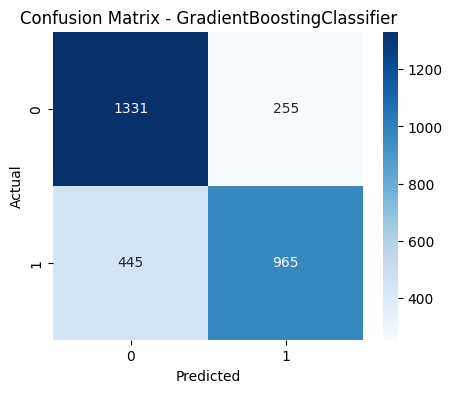

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1586
           1       0.89      0.78      0.83      1410

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Confusion Matrix:
 [[1450  136]
 [ 308 1102]]


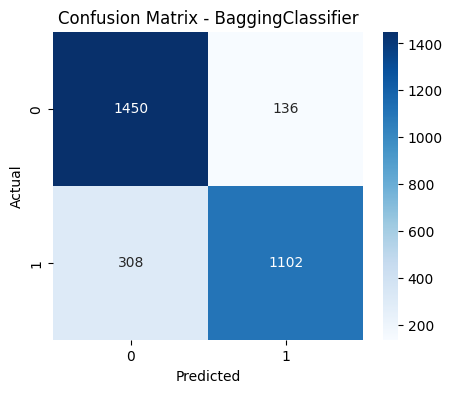

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1586
           1       0.78      0.76      0.77      1410

    accuracy                           0.79      2996
   macro avg       0.79      0.79      0.79      2996
weighted avg       0.79      0.79      0.79      2996

Confusion Matrix:
 [[1283  303]
 [ 332 1078]]


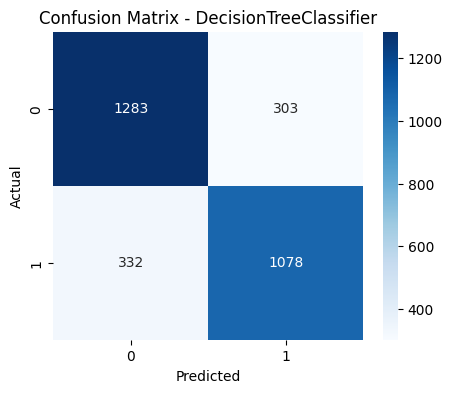

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.88      0.72      1586
           1       0.74      0.39      0.51      1410

    accuracy                           0.65      2996
   macro avg       0.68      0.63      0.61      2996
weighted avg       0.67      0.65      0.62      2996

Confusion Matrix:
 [[1391  195]
 [ 867  543]]


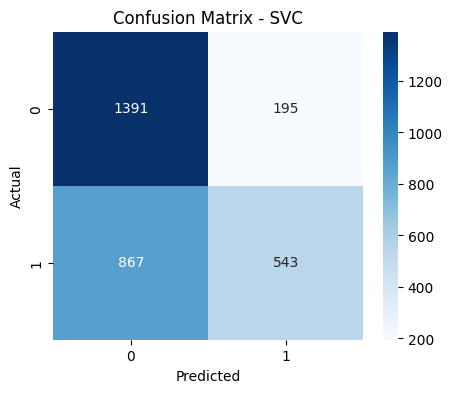

In [34]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

### ANN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [43]:
inputs = tf.keras.Input(shape=(10,1))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)
lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_3=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

Dense_2 = Dense(128, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_2)

model = tf.keras.Model(inputs, outputs)

In [44]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 10, 512)        │       657,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 10, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,641,857 (6.26 MB)

 Trainable params: 1,641,857 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
opt_adam = Adam(learning_rate=0.001)

model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])

In [46]:
# Reshape the input data to match the model's expected input shape
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
history = model.fit(X_train_reshaped, y_train,
                        batch_size=20,
                        epochs=40,
                        validation_data=(X_test_reshaped, y_test),)

Epoch 1/40


I0000 00:00:1744473345.520523   10682 cuda_dnn.cc:529] Loaded cuDNN version 90300


600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5634 - loss: 0.6910 - val_accuracy: 0.5858 - val_loss: 0.6675
Epoch 2/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6030 - loss: 0.6536 - val_accuracy: 0.6048 - val_loss: 0.6494
Epoch 3/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6199 - loss: 0.6279 - val_accuracy: 0.6582 - val_loss: 0.5959
Epoch 4/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6783 - loss: 0.5856 - val_accuracy: 0.7153 - val_loss: 0.5603
Epoch 5/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7273 - loss: 0.5258 - val_accuracy: 0.7463 - val_loss: 0.5020
Epoch 6/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7667 - loss: 0.4735 - val_accuracy: 0.7647 - val_loss: 0.4694
Epoch 7/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7784 - loss: 0.4577 - val_accuracy: 0.7737 - val_loss: 0.4616
Epoch 8/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8023 - loss: 0.4185 - val_accuracy: 0.7840 -

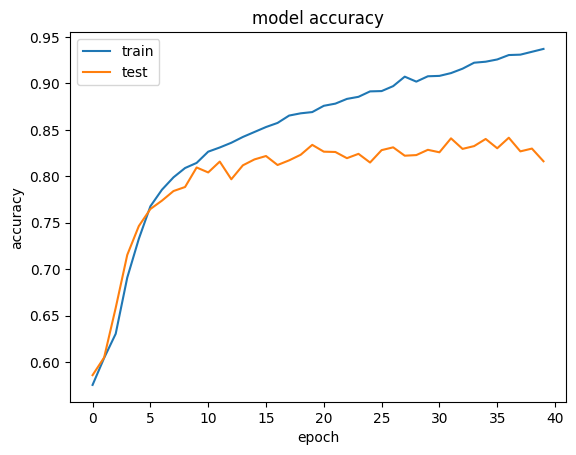

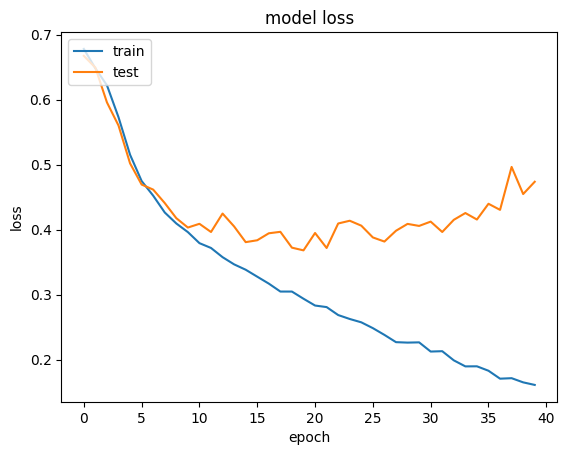

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

